# 1. Preparation

Import the necessary packages for the project.

In [1]:
#import packages
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import statistics as stats
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 2. Stock Selection

Ask the user of our "Sale of Shares Advisor" to input the desired stock ticker for the valuation.
<br>**For example:** AAPL (Apple Inc.)

In [2]:
#identify stock
stock_input = input("Enter Stock Ticker: ")

Enter Stock Ticker: AAPL


Use the Yahoo! Finace market data downloader and the Ticker module in order to access the ticker data of the chosen stock.

In [3]:
stock = yf.Ticker(stock_input)

Now check the chosen stock.
- **First step:** Ask the user to input a valid stock ticker if an error message appears.
<br>Otherwise inform the user about the company name according to the chosen stock ticker. 
- **Second step:** The DCF method is appropiate for business valuations. But not for the valuation of banks and financial istitutions, as financial institutions are highly levered and they do not re-invest debt in the business and instead use it to create products.<br> Inform the user if the 'Sale of Shares Advisor" is appropriate for the chosen stock

In [4]:
def check(stock):
    """
    checks if the chosen stock is valid and appropriate for the firm valuation with the DCF method
    
    Parameters
    ----------
    stock : TYPE: yfinance.ticker.Ticker
            DESCRIPTION: chosen stock, that should be checked
    -------
    """
    try:
        ticker = stock.info['symbol']
        name = stock.info['shortName']
        print('You have chosen "{}" for the valuation!'.format(name))
    except KeyError:
        print("Please input a valid stock ticker")
    try:
        stock.balance_sheet.loc['Inventory'].iloc[1]
        print("Our 'Sale of Shares Advisor' is appropriate for the chosen stock!")
    except KeyError:
        print("Our 'Sale of Shares Advisor' is not appropriate for for Banks and Financial Institutions!")
check(stock)

You have chosen "Apple Inc." for the valuation!
Our 'Sale of Shares Advisor' is appropriate for the chosen stock!


# 3. Descriptive Statistics and Share Price Development

Present the user of the "Sale of Shares Advisor" descriptive statistics of the chosen stock and visualize the share price development over the last year.

In [8]:
#set name and ticker of chosen stock
ticker = stock.info['symbol']
name = stock.info['shortName']
#define time range 
start = dt.date(2020,5,31)
end = dt.date.today()
#download the stock price data
stock_prices = yf.download(ticker, start, end)
#show the data
stock_prices

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,79.437500,80.587502,79.302498,80.462502,79.923965,80791200
2020-06-02,80.187500,80.860001,79.732498,80.834999,80.293968,87642800
2020-06-03,81.165001,81.550003,80.574997,81.279999,80.735992,104491200
2020-06-04,81.097504,81.404999,80.195000,80.580002,80.040680,87560400
2020-06-05,80.837502,82.937500,80.807503,82.875000,82.320328,137250400
...,...,...,...,...,...,...
2021-05-20,125.230003,127.720001,125.099998,127.309998,127.309998,76857100
2021-05-21,127.820000,128.000000,125.209999,125.430000,125.430000,79209300
2021-05-24,126.010002,127.940002,125.940002,127.099998,127.099998,63092900


In [41]:
#summary statistics
def my_summary_stats(data):
    """
    Summary stats: mean, variance, standard deviation, maximum and minimum.
    Prints descriptive table of the data
    
    Parameters
    ----------
    data :  TYPE: pd.DataFrame
            DESCRIPTION: dataframe for which descriptives will be computed
    -------
    """
    # generate storage for the stats as an empty dictionary
    my_descriptives = {}
    # loop over columns
    for col_id in data.columns:
        # fill in the dictionary with descriptive values by assigning the
        # column ids as keys for the dictionary
        my_descriptives[col_id] = [format(data[col_id].mean(),'f'), # mean
                                   data[col_id].var(),               # variance
                                   data[col_id].std(),                # st.dev.
                                   data[col_id].max(),                # maximum
                                   data[col_id].min(),                # minimum
                                   sum(data[col_id].isna()),          # missing
                                   len(data[col_id].unique()),  # unique values
                                   data[col_id].shape[0]]      # number of obs.
    # convert the dictionary to dataframe for a nicer output and name rows
    # Transpose for having the stats as columns
    my_descriptives = pd.DataFrame(my_descriptives,
                                   index=['mean', 'var', 'std', 'max', 'min',
                                          'na', 'unique', 'obs']).transpose()
    # define na, unique and obs as integers such that no decimals get printed
    ints = ['na', 'unique', 'obs']
    # use the .astype() method of pandas dataframes to change the type
    my_descriptives[ints] = my_descriptives[ints].astype(int)
    # print the descriptives
    print('Descriptive Statistics of {} Share Price and Volume between {} and {}:'.format(name, start, end), '-' * 80, round(my_descriptives, 2), '-' * 80, '\n\n', sep='\n')
my_summary_stats(stock_prices)

Descriptive Statistics of Apple Inc. Share Price and Volume between 2020-05-31 and 2021-05-27:
--------------------------------------------------------------------------------
                       mean          var          std        max       min  \
Open             117.947640      219.947      14.8306      143.6   79.4375   
High             119.382620      220.393      14.8456     145.09   80.5875   
Low              116.295240      211.552      14.5448     141.37   79.3025   
Close            117.868070      214.649      14.6509     143.16   80.4625   
Adj Close        117.449530      217.869      14.7604    142.704    79.924   
Volume     126875222.400000  2.84841e+15  5.33705e+07  374336800  46691300   

           na  unique  obs  
Open        0     242  250  
High        0     242  250  
Low         0     242  250  
Close       0     246  250  
Adj Close   0     247  250  
Volume      0     250  250  
--------------------------------------------------------------------------

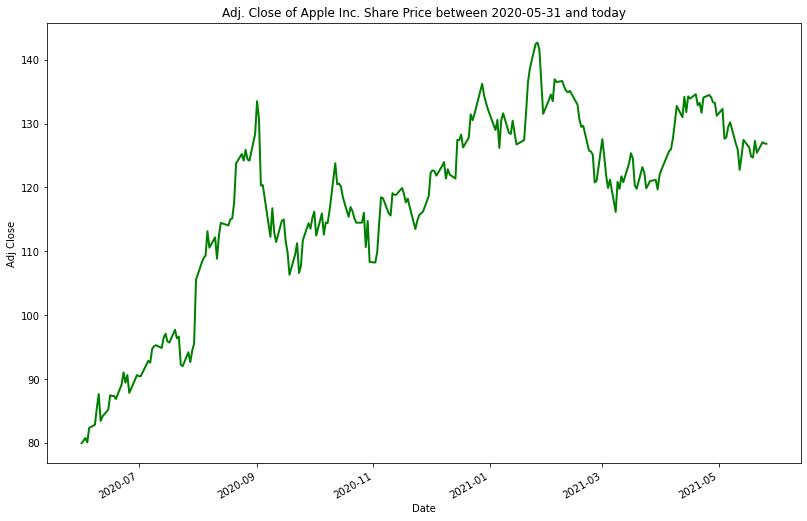

In [40]:
#visualization of stock price development
plt.figure(figsize = (13.5,9))
stock_prices['Adj Close'].plot(linewidth=2.0, color = 'g')
plt.title('Adj. Close of {} Share Price between 2020-05-31 and today'.format(name))
plt.ylabel('Adj Close')
plt.show()

# 4. Assumptions for Intrinsic Firm Valuation with DCF Method

In [11]:
#assumptions
perpetual_rate = 0.02
riskfree_rate = 0.01

#projection horizon
years = [1, 2, 3, 4, 5]

# 5. Firm Valuation with DCF Method

### First Step: Historical FCFF Calculation
Collect the historical data for all parameters and calculate the FCFF for the last 4 years.<br>

**FCFF Forumula:**
> $ FCFF = EBIT - Taxes + D&A Expense - CapEx - Δ Net WC $

**FCFF Parameters:**
- FCFF = Free Cash Flow to Firm
- EBIT = Earnings before Interest and Taxes
- Taxes = Cash Taxes
- D&A Expense = Depreciation and Amortization expense
- CapEx = Capital Expenditures
- Δ Net WC = Changes in Net Working Capital

In [37]:
#get historical data
free_cashflows_list = []

for y in range(0,3):
        #EBIT, D&A, CapEx, tax
    ebit = stock.financials.loc['Ebit'].iloc[y]
    tax_expense = stock.financials.loc['Income Tax Expense'].iloc[y]
    depreciation_amortization = stock.cashflow.loc['Depreciation'].iloc[y]
    capex = stock.cashflow.loc['Capital Expenditures'].iloc[y]

        #change in net working capital
    operating_current_assets = stock.balance_sheet.loc['Net Receivables'].iloc[y] + stock.balance_sheet.loc['Inventory'].iloc[y]
    operating_current_liabilities = stock.balance_sheet.loc['Accounts Payable'].iloc[y]
    net_working_capital = operating_current_assets - operating_current_liabilities

    lastyear_operating_current_assets = stock.balance_sheet.loc['Net Receivables'].iloc[y+1] + stock.balance_sheet.loc['Inventory'].iloc[y+1]
    lastyear_operating_current_liabilities = stock.balance_sheet.loc['Accounts Payable'].iloc[y+1]
    lastyear_net_working_capital = lastyear_operating_current_assets - lastyear_operating_current_liabilities

    change_in_net_working_capital = net_working_capital - lastyear_net_working_capital

        #free cash flow
    freecashflow = ebit - tax_expense + depreciation_amortization - capex - change_in_net_working_capital
    free_cashflows_list.append(freecashflow)

#present historical free cashflows of the last three years
print('Historical FCFF (last 3 years):\n {}'.format(free_cashflows_list))

Historical FCFF (last 3 years):
 [79437000000.0, 69880000000.0, 80965000000.0]


### Second Step: Cashflow Growth Rate Calculation and Future FCFF Prediction

In [36]:
#cashflow growth rate
histcl_cashflow_growthrates = []

cashflow_growthrate_1 = free_cashflows_list[0] / free_cashflows_list[1] - 1
cashflow_growthrate_2 = free_cashflows_list[1] / free_cashflows_list[2] - 1

histcl_cashflow_growthrates.append(cashflow_growthrate_1)
histcl_cashflow_growthrates.append(cashflow_growthrate_2)

if histcl_cashflow_growthrates[0] > histcl_cashflow_growthrates[1] and histcl_cashflow_growthrates[1] > 0:
    cashflow_growthrate = histcl_cashflow_growthrates[1]
elif histcl_cashflow_growthrates[0] <= 0.3:
    cashflow_growthrate = histcl_cashflow_growthrates[0]
else:
    cashflow_growthrate = stats.mean(histcl_cashflow_growthrates)
    

#predict future cashflows
future_freecashflow = []

for year in years:
    cashflow = free_cashflows_list[0] * (1 + cashflow_growthrate) ** year
    if cashflow >= 0: #prevent negative cashflows
        future_freecashflow.append(cashflow)
    else:
        future_freecashflow.append(0)
#present futere free cashflows (next 5 years)
print('Future FCFF (next 5 years):\n {}'.format(future_freecashflow))

Future FCFF (next 5 years):
 [90301044204.35031, 102650887928.74895, 116689733606.1252, 132648574248.27945, 150789994169.44153]


### Third Step: WACC Calculation
Calculate the Cost of Capital (WACC), our discount rate for the future FCFF.<br>
Discount future FCFF with cost of capital (WACC) to get the value of firm.<br>

**WACC Forumula:**
> $ WACC = (D/D+E) * (1-t)rd + (E/D+E) * (1-t)re $

**WACC Parameters:**
- WACC = Cost of Capital
- D = Value of Dept
- E = Value of Equity
- D+E = Value of Firm
- rd = Posttax Cost of Dept
- re = Cost of Equity

In [35]:
##Calculate Cost of Capital
    
#capital structure
Equity = stock.balance_sheet.loc['Total Stockholder Equity'].iloc[0] / stock.balance_sheet.loc['Total Assets'].iloc[0]
Dept = stock.balance_sheet.loc['Total Liab'].iloc[0] / stock.balance_sheet.loc['Total Assets'].iloc[0]

#cost of equity
    #get market index
if stock.info["country"] == "United States":
    benchmark = "^GSPC"
elif stock.info["country"] == "Switzerland":
    benchmark = "^SSMI"
elif stock.info["country"] == "Germany":
    benchmark = "^GDAXI"
elif stock.info["country"] == "United Kingdom":
    benchmark = "^FTSE"
elif stock.info["country"] == "France":
    benchmark = "^FCHI"
elif stock.info["country"] == "Italy":
    benchmark = "FTSEMIB.MI"
elif stock.info["country"] == "Spain":
    benchmark = "^IBEX"
elif stock.info["country"] == "Japan":
    benchmark = "^N225"
else:
    benchmark = "MWL=F" #msci world
    
    #calculate average market return
histcl_market_data = pdr.get_data_yahoo(benchmark)["Adj Close"]
yrly_market_return = histcl_market_data.resample('Y').ffill().pct_change()
yrly_market_return = yrly_market_return.dropna(axis=0) #drop NaN in first row

average_market_return = yrly_market_return.mean()

    #calculate equity cost
try:
    beta = stock.info['beta']
    cost_equity = riskfree_rate + beta * (average_market_return - riskfree_rate)
except ValueError:
    histcl_stock_data = pdr.get_data_yahoo(stock_input)["Adj Close"]
    yrly_stock_return = histcl_market_data.resample('Y').ffill().pct_change()
    yrly_stock_return = yrly_stock_return.dropna(axis=0) #drop NaN in first row
    cost_equity = yrly_stock_return.mean()
    
#cost of dept
histcl_interest_expense = [stock.financials.loc['Interest Expense'].iloc[0], 
                           stock.financials.loc['Interest Expense'].iloc[1], 
                           stock.financials.loc['Interest Expense'].iloc[2]]
avg_interest_expense = stats.mean(histcl_interest_expense)

histcl_dept_balance = [stock.balance_sheet.loc["Long Term Debt"].iloc[0],
                       stock.balance_sheet.loc["Long Term Debt"].iloc[1],
                       stock.balance_sheet.loc["Long Term Debt"].iloc[2]]
avg_dept_balance = stats.mean(histcl_dept_balance)

cost_dept = abs(avg_interest_expense / avg_dept_balance)

#tax shield
tax_rate = tax_expense / (ebit - stock.financials.loc['Interest Expense'].iloc[0])
tax_shield = 1 - tax_rate

#combinded
WACC = cost_equity * Equity + cost_dept * Dept * tax_shield

#present WACC
print('WACC:\n {}'.format(WACC))

WACC:
 0.05605960472985951


### Fourth Step: Discount Future FCFF
Discount the calculated future FCFF with the Cost of Capital (WACC)<br>


In [34]:
#discount cashflows
discountfactor = []
discounted_future_freecashflow = []

for year in years:
    discountfactor.append((1 + WACC) ** year)
    
for x in range(0, len(years)):
    discounted_future_freecashflow.append(future_freecashflow[x] / discountfactor[x])

#get terminal value and discount the terminal value
terminal_value = future_freecashflow[-1] * (1 + perpetual_rate) / (WACC - perpetual_rate)
discounted_terminal_value = terminal_value / discountfactor[-1] ** years[-1]

#present the discounted future free cashflows
discounted_future_freecashflow

print('Discounted Future FCFF:\n {}'.format(discounted_future_freecashflow))

Discounted Future FCFF:
 [85508248937.9108, 92043514186.43358, 99078259805.55266, 106650660319.3499, 114801807872.64798]


### Fifth Step: Instrinsic Value Calculation
Calcualte the fair value per share.<br>

In [38]:
#get instrinsic value
discounted_future_freecashflow.append(discounted_terminal_value)
enterprise_value = sum(discounted_future_freecashflow)
equity_value = enterprise_value + stock.balance_sheet.loc['Cash'].iloc[0] - stock.balance_sheet.loc['Long Term Debt'].iloc[0]

#prevent negative equity value
if equity_value >= 0:
    equity_value = equity_value
else:
    equity_value = 0.01
    
#get the amount of outstanding shares
shares_outstanding = stock.info['sharesOutstanding']

#calculate the value per share
fairvalue_per_share = round(equity_value / shares_outstanding, 2)
fairvalue_per_share

# present the fair value per share
print('Fair Value per Share:\n {}'.format(fairvalue_per_share))

Fair Value per Share:
 91.61


# 6. Current Share Price
Get the current share price (observed) as basis for our recommendation

In [39]:
#current stock price
current_shareprice = stock.info['previousClose']
current_shareprice

# present the current stock price
print('Current Share Price:\n {}'.format(current_shareprice))

Current Share Price:
 126.85


# 7. Recommendation

In [21]:
#Recommendation
if fairvalue_per_share > current_shareprice * 1.09:
    advice = "BUY"
elif fairvalue_per_share > current_shareprice:
    advice = "HOLD"
elif fairvalue_per_share > current_shareprice * 0.91:
    advice = "HOLD"
elif fairvalue_per_share < current_shareprice:
    advice = "SELL"
else:
    advice = "HOLD"

In [22]:
#Conclusion
if fairvalue_per_share > current_shareprice * 1.17:
    concl = "highly undervalued"
elif fairvalue_per_share > current_shareprice * 1.05:
    concl = "slightly undervalued"
elif fairvalue_per_share > current_shareprice:
    concl = "efficient pricing"
elif fairvalue_per_share > current_shareprice * 0.95:
    concl = "efficient pricing"
elif fairvalue_per_share > current_shareprice * 0.86:
    concl = "slightly overvalued"
elif fairvalue_per_share < current_shareprice:
    concl = "highly overvalued"
else:
    concl = "efficient pricing"

# 8. Present "Sale of Shares Advisor" Results

In [23]:
#final output
print("")
print("---------------------------------------------------\n")
print("Conclusion: " + concl)
print("Recommendation: " + advice)
print("")
print("  -> Fair value of " + name + ": " + str(fairvalue_per_share) + " " + str(stock.info["currency"]))
print("")
print("  -> Current Share Price: " + str(current_shareprice) + " " + str(stock.info["currency"]))
print("")
print("---------------------------------------------------")


---------------------------------------------------

Conclusion: highly undervalued
Recommendation: BUY

  -> Fair value of Apple Inc.: 157.17 USD

  -> Current Share Price: 126.85 USD

---------------------------------------------------
